In [2]:
import numpy as np
import matplotlib.pyplot as plt

import py.twoD.continuum2d as continuum2d

from py.twoD.params2d import setParams
from py.twoD.analysis2d import computeFPs, checkFixPtsStability, a_jkValues, violationType

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

In [3]:
params=None
c2d = continuum2d.continuum2d()

2d Model initialised.


In [4]:
l=101
k = np.linspace(0,2,l)
kk = [] #np.zeros(int((((N-1)*N)/2)+N))

for idx1 in range(l):
    for idx2 in range(idx1, l):
        kk.append(k[idx1]**2+k[idx2]**2)
kk.sort()
kk = np.array(kk)

In [5]:
#for the steady state

ee = 0.3
ii = -0.1

params1={'I_e': ee, 'I_i': ii, 'end_t': 2*1000, 'sigma_e': 1, 'sigma_i': 3, 'pic_nmb': 25, 'xlength': 50, 'ylength': 50} # , 'n': 6, 'm': 506, 'xlength': 50, 'ylength': 50

ps1 = setParams(params1)
fps1 = computeFPs(ps1)
stab1 = checkFixPtsStability(fps1, ps1)
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps1[list(stab1).index(1)], ps1)
violation, k0 = violationType(kk, a_ee, a_ei, a_ie, a_ii, ps1)

print('For I_e=%.2f, I_i=%.2f, we have the fixed point %s with stability %i and violation %i ' 
      %(ee, ii, fps1[0], stab1[0], violation))

For I_e=0.30, I_i=-0.10, we have the fixed point [0.1246155  0.41871371] with stability 1 and violation 1 


/Users/ronja/Documents/GitHub/neural-fields/py/twoD/kernels2d.py:33: RuntimeWarning: overflow encountered in exp
  return np.exp((-2.0) * (np.pi**2) * (sigma**2) * k )
/Users/ronja/Documents/GitHub/neural-fields/py/twoD/analysis2d.py:402: RuntimeWarning: invalid value encountered in subtract
  return (turing_A11(k, a_ee, params)*turing_A22(k, a_ii, params))-(turing_A12(k, a_ei, params)*turing_A21(k, a_ie, params))


In [6]:
#for the bumps

ee = -0.1
ii = -0.9

params2={'I_e': ee, 'I_i': ii, 'end_t': 2*1000, 'sigma_e': 1, 'sigma_i': 3, 'pic_nmb': 25, 'xlength': 50, 'ylength': 50} # , 'n': 6, 'm': 506, 'xlength': 50, 'ylength': 50

ps2 = setParams(params2)
fps2 = computeFPs(ps2)
stab2 = checkFixPtsStability(fps2, ps2)
#a_ee, a_ei, a_ie, a_ii = a_jkValues(fps2[list(stab2).index(1)], ps2)
#violation, k0 = violationType(kk, a_ee, a_ei, a_ie, a_ii, ps2)

#print('For I_e=%.2f, I_i=%.2f, we have the fixed point %s with stability %i and violation %i ' 
#      %(ee, ii, fps2[0], stab2[0], violation))
fps2

array([[0.40260202, 0.48740518]])

In [13]:
steady, inh = c2d.run(ps1, fp=fps1[0])

In [7]:
bump, inh = c2d.run(ps2, fp=fps2[0])

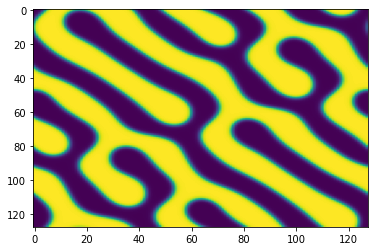

1


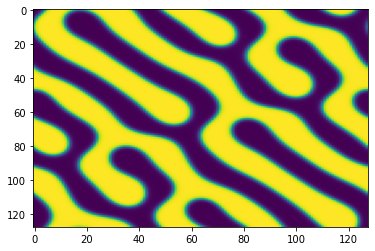

2


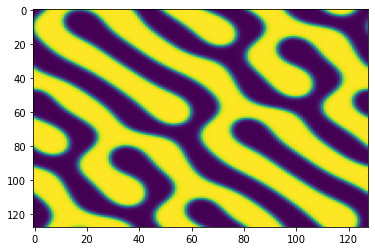

3


In [8]:
count = 0
for array in bump[-3:]:
    plt.imshow(array.T, vmin=0, vmax=1, aspect='auto')
    plt.show()
    count+=1
    print(count)

In [14]:
steady_list = [steady[-1], steady[-2], steady[-3]]

In [15]:
bump_list = [bump[-1], bump[-2], bump[-3]]

In [16]:
for i in range(1,3):
    if (np.isclose(steady_list[i-1], steady_list[i])).all():
        print('stationary')
    else:
        print('temporal')

temporal
temporal


In [17]:
for i in range(1,3):
    if (np.isclose(bump_list[i-1], bump_list[i])).all():
        print('stationary')
    else:
        print('temporal')

temporal
temporal


In [18]:
steady_frequs = np.fft.fftshift(np.fft.fft2(steady[-1]))
bump_frequs = np.fft.fftshift(np.fft.fft2(bump[-1]))

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


steady_norm = sigmoid(steady_frequs)
bump_norm = sigmoid(steady_frequs)

steady_reals = sigmoid(steady_frequs.real)
steady_imags = sigmoid(steady_frequs.imag)

bump_reals = sigmoid(bump_frequs.real)
bump_imags = sigmoid(bump_frequs.imag)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5768/2571558228.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_5768/2571558228.py:2: RuntimeWarning: invalid value encountered in true_divide
  return 1 / (1 + np.exp(-x))


Text(0.5, 1.0, '$imag(f_{bump})$')

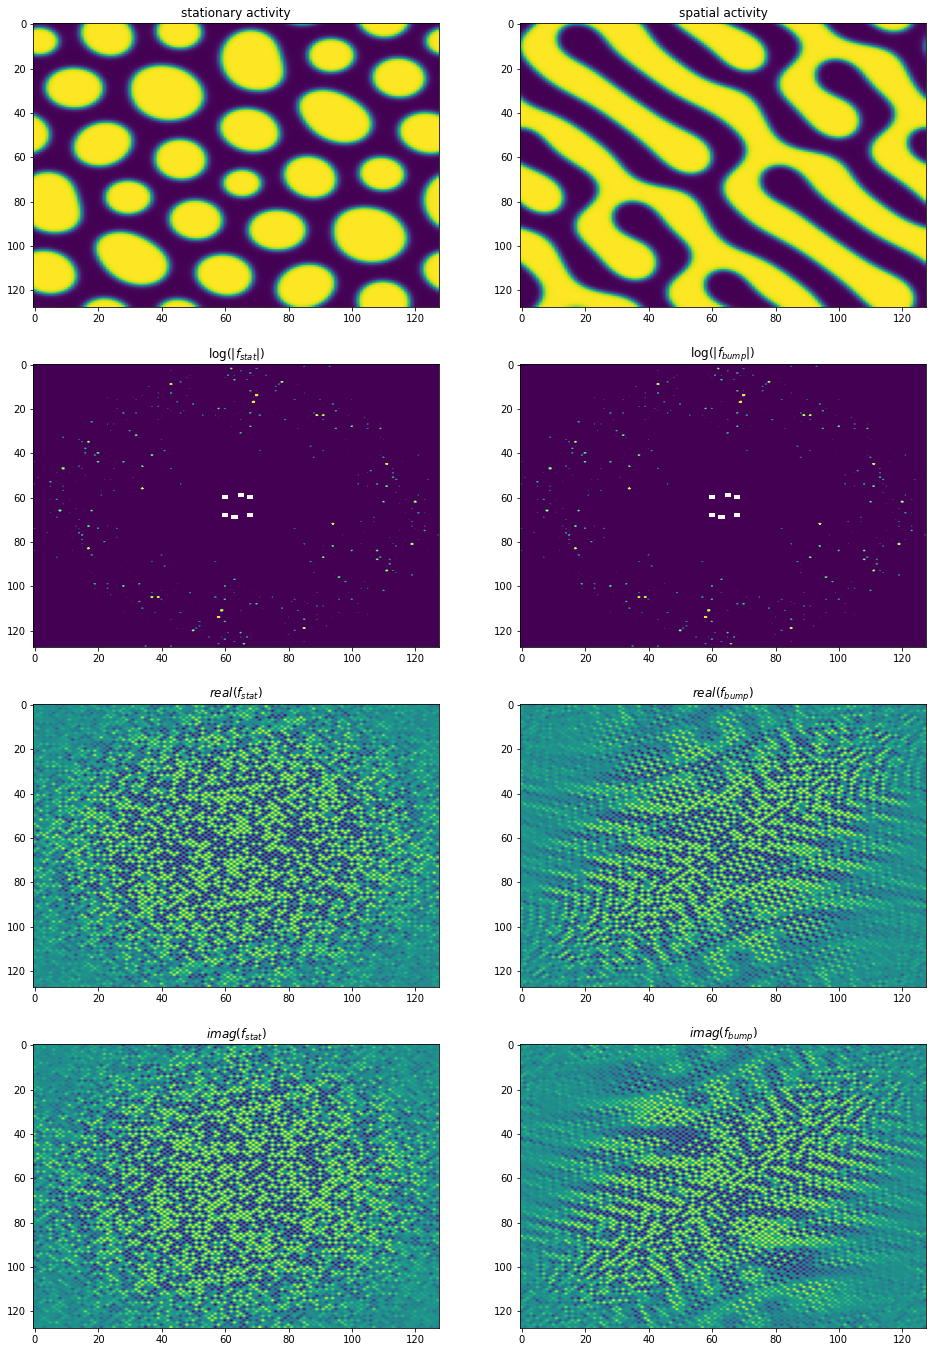

In [20]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(4, 2, figsize=(16,24))

ax0.imshow(steady[-1].T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(bump[-1].T, vmin=0, vmax=1, aspect='auto')
ax0.set_title('stationary activity')
ax1.set_title('spatial activity')


ax2.imshow(np.log(abs(steady_norm)), vmin=0, vmax=1, aspect='auto')
ax3.imshow(np.log(abs(bump_norm)), vmin=0, vmax=1, aspect='auto')
ax2.set_title(r'$\log(|f_{stat}|)$')
ax3.set_title(r'$\log(|f_{bump}|)$')


ax4.imshow(steady_reals, vmin=0, vmax=1, aspect='auto')
ax5.imshow(bump_reals, vmin=0, vmax=1, aspect='auto')
ax4.set_title(r'$real(f_{stat})$')
ax5.set_title(r'$real(f_{bump})$')


ax6.imshow(steady_imags, vmin=0, vmax=1, aspect='auto')
ax7.imshow(bump_imags, vmin=0, vmax=1, aspect='auto')
ax6.set_title(r'$imag(f_{stat})$')
ax7.set_title(r'$imag(f_{bump})$')

In [21]:
steady_abs_diff = np.max(abs(steady_frequs)) - np.min(abs(steady_frequs))
steady_real_diff = np.max(steady_reals) - np.min(steady_reals)
steady_imag_diff = np.max(steady_imags) - np.min(steady_imags)
steady_abs_diff, steady_real_diff, steady_imag_diff

(7412.616590702401, 1.0, 1.0)

In [22]:
bump_abs_diff = np.max(abs(bump_frequs)) - np.min(abs(bump_frequs))
bump_real_diff = np.max(bump_reals) - np.min(bump_reals)
bump_imag_diff = np.max(bump_imags) - np.min(bump_imags)
bump_abs_diff, bump_real_diff, bump_imag_diff

(8801.19931588319, 1.0, 1.0)

(nan, nan)